In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [129]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [130]:
train.shape, test.shape

((10471, 23), (2991, 22))

In [131]:
train.loc[train['isExpelled'] == 'f', 'isExpelled'] = 0
train.loc[train['isExpelled'] == 't', 'isExpelled'] = 1
train['isExpelled'] = train['isExpelled'].astype(int)

In [132]:
test.loc[test['isExpelled'] == 'f', 'isExpelled'] = 0
test.loc[test['isExpelled'] == 't', 'isExpelled'] = 1
test['isExpelled'] = test['isExpelled'].astype(int)

In [133]:
train.loc[train['isFailed'] == 'f', 'isFailed'] = 0
train.loc[train['isFailed'] == 't', 'isFailed'] = 1
train['isFailed'] = train['isFailed'].astype(int)

In [134]:
test.loc[test['isFailed'] == 'f', 'isFailed'] = 0
test.loc[test['isFailed'] == 't', 'isFailed'] = 1
test['isFailed'] = test['isFailed'].astype(int)

In [135]:
train.loc[train['repository'].notnull(), 'repository'] = 1
train['repository'] = train['repository'].fillna(0)

In [136]:
test.loc[test['repository'].notnull(), 'repository'] = 1
test['repository'] = test['repository'].fillna(0)

In [137]:
train['repository'] = train['repository'].fillna(0)

In [138]:
train.loc[train['mentorId'].notnull(), 'mentorId'] = 1
train['mentorId'] = train['mentorId'].fillna(0)

In [139]:
test.loc[test['mentorId'].notnull(), 'mentorId'] = 1
test['mentorId'] = test['mentorId'].fillna(0)

In [140]:
train.loc[train['repositoryLastActivityDate'].notnull(), 'repositoryLastActivityDate'] = 1
train['repositoryLastActivityDate'] = train['repositoryLastActivityDate'].fillna(0)

In [141]:
test.loc[test['repositoryLastActivityDate'].notnull(), 'repositoryLastActivityDate'] = 1
test['repositoryLastActivityDate'] = test['repositoryLastActivityDate'].fillna(0)

In [142]:
train.loc[train['educationHistory'] != '[]', 'educationHistory'] = 1
train.loc[train['educationHistory'] == '[]', 'educationHistory'] = 0
train['educationHistory'] = train['educationHistory'].astype(int)

In [143]:
test.loc[test['educationHistory'] != '[]', 'educationHistory'] = 1
test.loc[test['educationHistory'] == '[]', 'educationHistory'] = 0
test['educationHistory'] = test['educationHistory'].astype(int)

In [144]:
df_train_user_count = pd.DataFrame(train.groupby(['userId'])['userId']\
                  .count())\
                  .rename(columns={'userId':'user_count'}).reset_index()

In [145]:
df_test_user_count = pd.DataFrame(test.groupby(['userId'])['userId']\
                  .count())\
                  .rename(columns={'userId':'user_count'}).reset_index()

In [146]:
train = pd.merge(train,df_train_user_count, on=['userId'])
test = pd.merge(test,df_test_user_count, on=['userId'])

In [147]:
train.loc[train['user_count'] <= 2, 'user_count'] = 0
train.loc[train['user_count'] > 2, 'user_count'] = 1

In [148]:
test.loc[test['user_count'] <= 2, 'user_count'] = 0
test.loc[test['user_count'] > 2, 'user_count'] = 1

In [149]:
a = train['englishLevel'].unique().tolist()
b = test['englishLevel'].unique().tolist()

In [150]:
c = set(a+b)
c

{'3/5',
 'A+',
 'A-2',
 'A0',
 'A1',
 'A1 (Elementary)',
 'A1 Beginner',
 'A1 базовый',
 'A1+',
 'A1-A2',
 'A2',
 'A2 (pre-intermediate)',
 'A2 - B1',
 'A2 - Pre-Intermediate',
 'A2+',
 'A2+ (Streemline certificate 27.12.2019)',
 'A2+ - B1',
 'A2- B1',
 'A2-B1',
 'A2/B1',
 'Advanced',
 'Advanced ',
 'B1',
 'B1 (Средний)',
 'B1+',
 'B1-B2',
 'B1~B2',
 'B2',
 'B2 - Upper Intermediate',
 'B2+',
 'B2-C1',
 'B2-С1',
 'Beginner',
 'C1',
 'C1 (IELTS Academic)',
 'C1/IELTS 7.0',
 'Elementary',
 'Elementary English (A2)',
 'Good',
 'High Proficiency',
 'High-intermedite',
 'IELTS 5.5 / B2',
 'Intermediate',
 'Intermediate ',
 'Intermediate https://englex.ru/your-level/placement/?answer_id=2614678&hidesend=1',
 'Intermediate(B1-2)',
 'Intermediate+',
 'Intermidiate',
 'Native',
 'PRE-Intermediate',
 'Pre intermediate',
 'Pre-Intermediate',
 'Pre-Intermediate ',
 'Pre-intermediate',
 'Pre-intermediate (CEFR A2)',
 'Proficient',
 'Upper Intermediate ',
 'a0',
 'a1',
 'a1+',
 'a2',
 'a2+',
 'advanc

In [151]:
train_test_data = [train, test]

In [152]:
for data in train_test_data:
    data['englishLevel'] = data['englishLevel'].fillna('Z')
    data['englishLevel'] = data['englishLevel'].replace(['natalya.sadov@gmail.com',
                                                         'zero',
                                                         'З',
                                                        ], 'Z')
    data['englishLevel'] = data['englishLevel'].replace(['A+', 
                                                         'A1 (Elementary)',
                                                         'A1 Beginner',
                                                         'A1 базовый',
                                                         'A1+',
                                                         'Beginner',
                                                         'Elementary',
                                                         'a0',
                                                         'a1',
                                                         'a1+',
                                                         'beginer',
                                                         'easy',
                                                         'elementary',
                                                         'А1',
                                                         'Базовый',
                                                         'Начинающий ',
                                                         'на уровне чтения ',
                                                         'A0',
                                                        ], 'A1')
    data['englishLevel'] = data['englishLevel'].replace(['A-2',
                                                         'A1-A2',
                                                         'A2 (pre-intermediate)',
                                                         'A2 - Pre-Intermediate',
                                                         'A2+',
                                                         'A2+ (Streemline certificate 27.12.2019)',
                                                         'A2+ - B1',
                                                         'Elementary English (A2)',
                                                         'PRE-Intermediate',
                                                         'Pre intermediate',
                                                         'Pre-Intermediate',
                                                         'Pre-Intermediate ',
                                                         'Pre-intermediate',
                                                         'Pre-intermediate (CEFR A2)',
                                                         'a2',
                                                         'a2+',
                                                         'intermediate A2',
                                                         'pre intermediate',
                                                         'pre-intermedia',
                                                         'pre-intermediate',
                                                         'pre-intermediate a2',
                                                         'А2',
                                                         'А2+',
                                                        ], 'A2')
    data['englishLevel'] = data['englishLevel'].replace(['3/5',
                                                         'A2 - B1',
                                                         'A2- B1',
                                                         'A2-B1',
                                                         'A2/B1',
                                                         'B1 (Средний)',
                                                         'B1+',
                                                         'Good',
                                                         'Intermediate',
                                                         'Intermediate ',
                                                         'Intermediate https://englex.ru/your-level/placement/?answer_id=2614678&hidesend=1',
                                                         'Intermediate(B1-2)',
                                                         'Intermediate+',
                                                         'Intermidiate',
                                                         'b1',
                                                         'b1+',
                                                         'intermediate',
                                                         'intermediate ',
                                                         'intermediate(B1)',
                                                         'В1',
                                                         'средний',
                                                        ], 'B1')
    data['englishLevel'] = data['englishLevel'].replace(['B1-B2',
                                                         'B1~B2',
                                                         'B2 - Upper Intermediate',
                                                         'B2+',
                                                         'High-intermedite',
                                                         'IELTS 5.5 / B2',
                                                         'Upper Intermediate ',
                                                         'b1-b2',
                                                         'b2',
                                                         'b2+',
                                                         'up-intermediate',
                                                         'upper intermediate B1-B2',
                                                         'upper-intermediate',
                                                        ],
                                                        'B2')
    data['englishLevel'] = data['englishLevel'].replace(['Advanced',
                                                         'Advanced ',
                                                         'B2-C1',
                                                         'B2-С1',
                                                         'C1 (IELTS Academic)',
                                                         'C1/IELTS 7.0',
                                                         'advanced',
                                                         'b2-c1',
                                                         'c1',
                                                         'c1+',
                                                         'С1',
                                                        ], 'C1')
    data['englishLevel'] = data['englishLevel'].replace(['High Proficiency',
                                                         'Native',
                                                         'Proficient',
                                                         'c2',
                                                        ], 'C2')

In [153]:
train['englishLevel'].unique()

array(['Z', 'B1', 'A2', 'A1', 'B2', 'C1', 'C2'], dtype=object)

In [154]:
test['englishLevel'].unique()

array(['Z', 'A2', 'A1', 'B1', 'B2', 'C1', 'C2'], dtype=object)

In [155]:
pd.crosstab(train['englishLevel'], train['isTopPerformer'])

isTopPerformer,False,True
englishLevel,,
A1,985,290
A2,1274,709
B1,898,494
B2,381,203
C1,100,55
C2,18,3
Z,4236,825


In [156]:
#level = {'Z':0, 'A1':1, 'A2':2, 'B1':3, 'B2':4, 'C1':5, 'C2':6}
level = {'Z':0, 'A1':0, 'A2':0, 'B1':1, 'B2':1, 'C1':1, 'C2':0}
#level = {'Z':0, 'A1':0, 'A2':1, 'B1':1, 'B2':1, 'C1':1, 'C2':0}
for data in train_test_data:
    data['englishLevel'] = data['englishLevel'].map(level).astype(int)

In [157]:
train['englishLevel'].unique()

array([0, 1])

In [158]:
test['englishLevel'].unique()

array([0, 1])

In [159]:
train = train.query('courseId in [1,2,9,11,13,16,17,18,19,20,21]')
#train = train.query('courseId in [1,2,9,11,13,16,17,18,19,21]')

In [160]:
course = pd.read_csv('data/course.csv')
#course_temp = course[['courseId', 'primarySkillId', 'alias', 'completed']]
course_temp = course[['courseId', 'primarySkillId', 'alias', 'completed', 'inviteOnly']]

In [161]:
course_temp.loc[course_temp['inviteOnly'] == 'f', 'inviteOnly'] = 0
course_temp.loc[course_temp['inviteOnly'] == 't', 'inviteOnly'] = 1
course_temp['inviteOnly'] = course_temp['inviteOnly'].astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
for i in ['test-course', 'ios-2020', 'android-2020', 'js-fundamentals']:
    course_temp.loc[course_temp['alias'] == i, 'alias'] = i+'-q'

In [163]:
course_temp.loc[course_temp['alias'] == 'rs-uz-2019-q3', 'alias'] = 'rs-2019-q3'
course_temp.loc[course_temp['alias'] == 'rs-st-2019-q1', 'alias'] = 'rs-2019-q1'
course_temp.loc[course_temp['alias'] == 'rss-pl-2020-q1', 'alias'] = 'rss-2020-q1'

In [164]:
course_temp['skill'] = course_temp['alias'].apply(lambda x: x.split('-')[0])
course_temp['quarter'] = course_temp['alias'].apply(lambda x: x.split('-')[2])

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
primSkill = {'ios-obj-c' : 0,
             'android-kotlin': 0,
             'nodejs': 0,
             'javascript': 1
            }
course_temp['primarySkillId'] = course_temp['primarySkillId'].map(primSkill).astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
skill_repl = {'react': '0',
              'test': '1',
              'ios': '0',
              'rs': '1',
              'android': '0',
              'st': '1',
              'angular': '0',
              'js': '1',
              'rss': '1',
              'nodejs': '0',
             }
course_temp['skill'] = course_temp['skill'].map(skill_repl).astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [167]:
quarter_repl = {'q': 0,
                'Q1': 1,
                'q1': 1,
                'Q3': 2,
                'q3': 2
               }
course_temp['quarter'] = course_temp['quarter'].map(quarter_repl).astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [168]:
course_temp.loc[course_temp['completed'] == 'f', 'completed'] = 0
course_temp.loc[course_temp['completed'] == 't', 'completed'] = 1
course_temp['completed'] = course_temp['completed'].astype(int)

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
#train.head(50)

In [170]:
train = pd.merge(train,course_temp.drop(['alias'], axis=1), on=['courseId'])
test = pd.merge(test,course_temp.drop(['alias'], axis=1), on=['courseId'])

In [171]:
train.shape, test.shape

((10143, 29), (2991, 28))

In [172]:
train['endDate'] = train['endDate'].fillna('empty')
test['endDate'] = test['endDate'].fillna('empty')

In [173]:
for i in range(train.shape[0]):
    if (train.iloc[i]['endDate'] == 'empty') or (train.iloc[i]['endDate'] == '1970-01-01 00:00:00+00'):
        train['endDate'].iloc[i] = course['courseEndDate'][course['courseId'] == train['courseId'].iloc[i]].item()

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [174]:
for i in range(test.shape[0]):
    if (test.iloc[i]['endDate'] == 'empty') or (test.iloc[i]['endDate'] == '1970-01-01 00:00:00+00'):
        test['endDate'].iloc[i] = course['courseEndDate'][course['courseId'] == test['courseId'].iloc[i]].item()

In [175]:
train['start_dates'] = train['startDate'].apply(lambda x: pd.to_datetime(x.split(' ')[0], format='%Y-%m-%d'))
train['end_dates'] = train['endDate'].apply(lambda x: pd.to_datetime(x.split(' ')[0], format='%Y-%m-%d'))

In [176]:
train['duration'] = (train['end_dates'] - train['start_dates']).dt.days.astype(int)
train.loc[train['duration'] <= 30, 'duration'] = 0
train.loc[(train['duration'] > 30) & (train['duration'] >= 60), 'duration'] = 1
train.loc[(train['duration'] > 60) & (train['duration'] < 90), 'duration'] = 2
train.loc[train['duration'] > 90, 'duration'] = 3
train['duration'] = train['duration'].astype(int)

In [177]:
test['start_dates'] = test['startDate'].apply(lambda x: pd.to_datetime(x.split(' ')[0], format='%Y-%m-%d'))
test['end_dates'] = test['endDate'].apply(lambda x: pd.to_datetime(x.split(' ')[0], format='%Y-%m-%d'))

In [178]:
test['duration'] = (test['end_dates'] - test['start_dates']).dt.days.astype(int)
test.loc[test['duration'] <= 30, 'duration'] = 0
test.loc[(test['duration'] > 30) & (test['duration'] <= 60), 'duration'] = 1
test.loc[(test['duration'] > 60) & (test['duration'] <= 90), 'duration'] = 2
test.loc[test['duration'] > 90, 'duration'] = 3
test['duration'] = test['duration'].astype(int)

In [179]:
task = pd.read_csv('data/task.csv')

In [180]:
task_results = pd.read_csv('data/task_results.csv')

In [181]:
task_temp = task[['courseId', 'courseTaskId', 'maxScore']]

In [182]:
for i in [1, 2, 4, 5, 6, 9, 10]:
    for j in task_temp[task_temp['courseId'] == i]['courseTaskId'].tolist():
        if np.isnan(task_temp['maxScore'][(task_temp['courseId'] == i) & (task_temp['courseTaskId'] == j)].item()):
            task_temp.loc[(task_temp['courseId'] == i) & (task_temp['courseTaskId'] == j), 'maxScore'] = \
                np.max(task_results[task_results['courseTaskId'] == j]['score'].unique())

In [183]:
task_temp.loc[(task_temp['courseId'] == 11) & (task_temp['courseTaskId'] == 347), 'maxScore'] = 8
task_temp.loc[(task_temp['courseId'] == 11) & (task_temp['courseTaskId'] == 343), 'maxScore'] = 10
task_temp.loc[(task_temp['courseId'] == 14) & (task_temp['courseTaskId'] == 334), 'maxScore'] = 30
task_temp.loc[(task_temp['courseId'] == 14) & (task_temp['courseTaskId'] == 364), 'maxScore'] = 35
task_temp.loc[(task_temp['courseId'] == 14) & (task_temp['courseTaskId'] == 365), 'maxScore'] = 30
task_temp.loc[(task_temp['courseId'] == 14) & (task_temp['courseTaskId'] == 352), 'maxScore'] = 10
task_temp.loc[(task_temp['courseId'] == 14) & (task_temp['courseTaskId'] == 362), 'maxScore'] = 10
task_temp.loc[(task_temp['courseId'] == 14) & (task_temp['courseTaskId'] == 324), 'maxScore'] = 5
task_temp.loc[(task_temp['courseId'] == 16) & (task_temp['courseTaskId'] == 393), 'maxScore'] = 280
task_temp.loc[(task_temp['courseId'] == 19) & (task_temp['courseTaskId'] == 431), 'maxScore'] = 100

In [184]:
task_temp['minScore'] = [0 for i in range(task_temp.shape[0])]

/Users/andreishchahlou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
for i in [1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 27, 28, 29]:
    for j in task_temp[task_temp['courseId'] == i]['courseTaskId'].tolist():
        task_temp.loc[(task_temp['courseId'] == i) & (task_temp['courseTaskId'] == j), 'minScore'] = \
            np.min(task_results[task_results['courseTaskId'] == j]['score'].unique())

In [186]:
task_temp_sum = task_temp.groupby(['courseId']).agg({'maxScore': 'sum'}).reset_index()

In [187]:
task_temp_sum['len_tasks'] = task_temp.groupby(['courseId']).agg({'courseTaskId': 'count'})['courseTaskId'].tolist()

In [188]:
task_temp_sum['minScore'] = task_temp.groupby(['courseId']).agg({'minScore': 'sum'})['minScore'].tolist()

In [189]:
train = pd.merge(train,task_temp_sum[['courseId', 'maxScore', 'len_tasks']], on=['courseId'])
test = pd.merge(test,task_temp_sum[['courseId', 'maxScore', 'len_tasks']], on=['courseId'])

In [190]:
train.shape, test.shape

((10143, 34), (2991, 33))

In [191]:
task_results_temp = task_results[['studentId', 'courseTaskId', 'score']]

In [192]:
task_results.shape

(94262, 10)

In [193]:
task_results_temp = pd.merge(task_results_temp, task_temp[['courseTaskId', 'courseId']], on=['courseTaskId'])

In [194]:
task_results_temp.shape

(94262, 4)

In [195]:
task_results_temp['studentId'].nunique()

8430

In [196]:
task_results_temp_sum = task_results_temp.groupby(['studentId', 'courseId']).agg({'score': 'sum'}).reset_index()

In [197]:
task_results_temp_sum['number_tasks'] = task_results_temp.groupby(['studentId', 'courseId']).agg({'courseTaskId': 'count'})['courseTaskId'].tolist()

In [198]:
train_st = train['studentId'].unique().tolist()
rez_st = task_results['studentId'].unique().tolist()
train_empty = list(set(train_st) - set(rez_st))

In [199]:
train_course_empty = []
for i in train_empty:
    train_course_empty.append(train.loc[train['studentId'] == i]['courseId'].item())

In [200]:
# train_score_empty = [0 i in range(len(train_empty))]
# train_tasks_empty = [0 for i in range(len(train_empty))]

In [201]:
train_score_empty = [task_temp_sum['minScore'][task_temp_sum['courseId'] == train['courseId'][train['studentId'] == i].item()].item() for i in train_empty]
train_tasks_empty = [1 for i in range(len(train_empty))]

In [202]:
train_empty_df = pd.DataFrame({'studentId': train_empty, 
                              'courseId': train_course_empty,
                              'score': train_score_empty,
                              'number_tasks': train_tasks_empty
                             })

In [203]:
task_results_temp_sum = pd.concat([task_results_temp_sum, train_empty_df], ignore_index=True)

In [204]:
test_st = test['studentId'].unique().tolist()
#rez_st = task_results['studentId'].unique().tolist()
test_empty = list(set(test_st) - set(rez_st))

In [205]:
test_course_empty = []
for i in test_empty:
    test_course_empty.append(test.loc[test['studentId'] == i]['courseId'].item())

In [206]:
# test_score_empty = [0 for i in range(len(test_empty))]
# test_tasks_empty = [1 for i in range(len(test_empty))]

In [207]:
test_score_empty = [task_temp_sum['minScore'][task_temp_sum['courseId'] == test['courseId'][test['studentId'] == i].item()].item() for i in test_empty]
test_tasks_empty = [1 for i in range(len(test_empty))]

In [208]:
test_empty_df = pd.DataFrame({'studentId': test_empty, 
                              'courseId': test_course_empty,
                              'score': test_score_empty,
                              'number_tasks': test_tasks_empty
                             })

In [209]:
task_results_temp_sum = pd.concat([task_results_temp_sum, test_empty_df], ignore_index=True)

In [210]:
task_results_temp_sum.shape

(13447, 4)

In [211]:
train = pd.merge(train,task_results_temp_sum, on=['studentId', 'courseId'])
test = pd.merge(test,task_results_temp_sum, on=['studentId', 'courseId'])

In [212]:
train['score_part'] = train['score'] / train['maxScore']
test['score_part'] = test['score'] / test['maxScore']

In [213]:
train['tasks_part'] = train['number_tasks'] / train['len_tasks']
test['tasks_part'] = test['number_tasks'] / test['len_tasks']

In [214]:
train.shape, test.shape

((10143, 38), (2991, 37))

In [215]:
train = train.sample(frac = 1)

In [216]:
test = test.sample(frac = 1)

In [217]:
train.head()

,studentId,createdDate,updatedDate,isExpelled,expellingReason,courseCompleted,isTopPerformer,preferedMentorGithubId,readyFullTime,courseId,userId,mentorId,cvUrl,hiredById,hiredByName,isFailed,startDate,endDate,repository,repositoryLastActivityDate,idUser,educationHistory,englishLevel,user_count,primarySkillId,completed,inviteOnly,skill,quarter,start_dates,end_dates,duration,maxScore,len_tasks,score,number_tasks,score_part,tasks_part
9063,1906,2019-04-30 09:29:01.697887,2019-04-30 09:29:01.697887,0,NaN,f,False,NaN,NaN,2,3676,0.0,NaN,NaN,NaN,0,2018-09-01 19:47:14.081+00,2018-12-31 19:47:14.081+00,0,0,3676,0,0,0,1,1,0,1,2,2018-09-01,2018-12-31,1,1781.0,15,284,1,0.159461,0.066667
7028,456,2019-04-22 16:15:21.081322,2019-08-05 08:55:09.750177,0,NaN,f,True,NaN,NaN,1,828,1.0,NaN,NaN,NaN,1,2019-01-01 00:49:13.461+00,2019-08-25 00:49:13.461+00,0,0,828,1,0,1,1,1,0,1,1,2019-01-01,2019-08-25,1,2027.0,15,423,6,0.208683,0.400000
2777,11598,2020-02-05 12:07:23.9935,2020-02-05 12:07:23.9935,0,NaN,f,False,NaN,NaN,16,1446,0.0,NaN,NaN,NaN,0,2020-02-05 12:07:23.99+00,2020-03-18 06:12:18.391+00,0,0,1446,1,1,1,1,1,1,0,1,2020-02-05,2020-03-18,42,1040.0,4,190,1,0.182692,0.250000
10062,12831,2020-02-17 16:43:55.135499,2020-07-01 21:12:00.757647,1,"Уважаемый Алексей, мы искренне сожалеем но вын...",f,False,NaN,NaN,18,10413,0.0,NaN,NaN,NaN,0,2020-02-17 16:43:55.133+00,2020-06-19 13:20:23.642+00,0,0,10413,0,1,0,0,0,0,0,0,2020-02-17,2020-06-19,1,1000.0,10,243,8,0.243000,0.800000
9778,13359,2020-02-20 16:11:30.947957,2020-10-13 21:00:01.563666,1,Course score is too low,f,False,NaN,NaN,19,10848,0.0,NaN,NaN,NaN,0,2020-02-20 16:11:30.945+00,2020-05-28 13:54:20.092+00,0,0,10848,0,0,0,0,0,0,0,0,2020-02-20,2020-05-28,1,9800.0,12,1010,1,0.103061,0.083333


In [218]:
train = train.drop(['studentId',
                    'createdDate',
                    'updatedDate',
                    #'isExpelled',
                    'expellingReason',
                    'courseCompleted',
                    'preferedMentorGithubId',
                    'readyFullTime',
                    'courseId',
                    'userId',
                    'cvUrl',
                    'hiredById',
                    'hiredByName',
                    #'isFailed',
                    #'repositoryLastActivityDate',
                    'idUser',
                    'startDate',
                    'endDate',
                    #'educationHistory',
                    #'englishLevel',
                    #'primarySkillId',
                    #'completed',
                    #'skill',
                    #'quarter',
                    #'inviteOnly',
                    #'user_count',
                    'maxScore',
                    'len_tasks',
                    'score',
                    'number_tasks',
                    'start_dates',
                    'end_dates',
                    #'duration',
                   ], axis=1)

In [219]:
test = test.drop(['createdDate',
                  'updatedDate',
                  #'isExpelled',
                  'expellingReason',
                  'courseCompleted',
                  'preferedMentorGithubId',
                  'readyFullTime',
                  'courseId',
                  'userId',
                  'cvUrl',
                  'hiredById',
                  'hiredByName',
                  #'isFailed',
                  #'repositoryLastActivityDate',
                  'idUser',
                  'startDate',
                  'endDate',
                  #'educationHistory',
                  #'englishLevel',
                  #'primarySkillId',
                  #'completed',
                  #'skill',
                  #'quarter',
                  #'inviteOnly',
                  #'user_count',
                  'maxScore',
                  'len_tasks',
                  'score',
                  'number_tasks',
                  'start_dates',
                  'end_dates',
                  #'duration'
                   ], axis=1)

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10143 entries, 9063 to 5142
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isExpelled                  10143 non-null  int64  
 1   isTopPerformer              10143 non-null  bool   
 2   mentorId                    10143 non-null  float64
 3   isFailed                    10143 non-null  int64  
 4   repository                  10143 non-null  int64  
 5   repositoryLastActivityDate  10143 non-null  int64  
 6   educationHistory            10143 non-null  int64  
 7   englishLevel                10143 non-null  int64  
 8   user_count                  10143 non-null  int64  
 9   primarySkillId              10143 non-null  int64  
 10  completed                   10143 non-null  int64  
 11  inviteOnly                  10143 non-null  int64  
 12  skill                       10143 non-null  int64  
 13  quarter                     1

In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 2765 to 105
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   studentId                   2991 non-null   int64  
 1   isExpelled                  2991 non-null   int64  
 2   mentorId                    2991 non-null   float64
 3   isFailed                    2991 non-null   int64  
 4   repository                  2991 non-null   int64  
 5   repositoryLastActivityDate  2991 non-null   int64  
 6   educationHistory            2991 non-null   int64  
 7   englishLevel                2991 non-null   int64  
 8   user_count                  2991 non-null   int64  
 9   primarySkillId              2991 non-null   int64  
 10  completed                   2991 non-null   int64  
 11  inviteOnly                  2991 non-null   int64  
 12  skill                       2991 non-null   int64  
 13  quarter                     299

In [222]:
train['isTopPerformer'] = train['isTopPerformer'].astype(str)

In [223]:
train.loc[train['isTopPerformer'] == 'False', 'isTopPerformer'] = 0
train.loc[train['isTopPerformer'] == 'True', 'isTopPerformer'] = 1
train['isTopPerformer'] = train['isTopPerformer'].astype(int)

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10143 entries, 9063 to 5142
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isExpelled                  10143 non-null  int64  
 1   isTopPerformer              10143 non-null  int64  
 2   mentorId                    10143 non-null  float64
 3   isFailed                    10143 non-null  int64  
 4   repository                  10143 non-null  int64  
 5   repositoryLastActivityDate  10143 non-null  int64  
 6   educationHistory            10143 non-null  int64  
 7   englishLevel                10143 non-null  int64  
 8   user_count                  10143 non-null  int64  
 9   primarySkillId              10143 non-null  int64  
 10  completed                   10143 non-null  int64  
 11  inviteOnly                  10143 non-null  int64  
 12  skill                       10143 non-null  int64  
 13  quarter                     1

In [225]:
test.head()

,studentId,isExpelled,mentorId,isFailed,repository,repositoryLastActivityDate,educationHistory,englishLevel,user_count,primarySkillId,completed,inviteOnly,skill,quarter,duration,score_part,tasks_part
2765,589,0,1.0,0,0,0,1,1,0,1,1,0,1,1,3,0.027627,0.066667
558,15607,0,0.0,0,0,0,0,0,1,1,1,0,0,2,1,0.000000,0.333333
541,14753,0,0.0,0,0,0,0,0,0,1,1,0,0,2,1,0.000000,0.333333
2309,12841,0,1.0,0,1,1,0,0,0,0,0,0,0,0,3,0.633000,0.700000
717,15338,0,0.0,0,0,0,1,0,0,1,1,0,0,2,1,0.000000,0.333333


<AxesSubplot:>

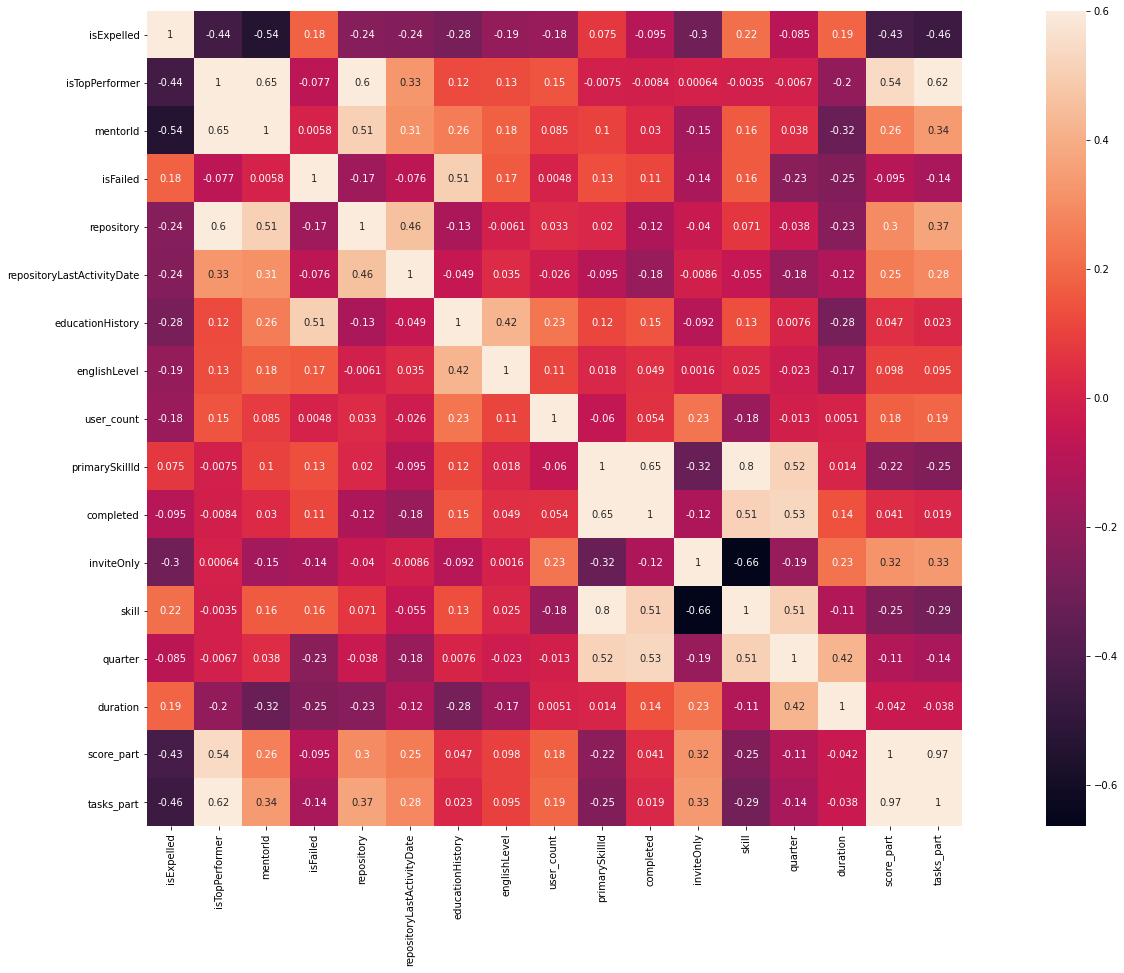

In [226]:
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

In [227]:
X = train.drop(['isTopPerformer'], axis=1)
y = train['isTopPerformer']

In [228]:
X_test = test.drop(['studentId'], axis=1)

In [232]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [233]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
rs_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [234]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

In [235]:
lr = LogisticRegression(C=0.001, class_weight='balanced', max_iter=10000, random_state=42)
#sgd = SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=42)
rfc = RandomForestClassifier(random_state=42)
scaler = StandardScaler()

In [236]:
models_f1 = []

# Without feature scaling, logistic regression
models_f1.append(cross_val_score(lr, X, y, scoring='f1', cv=rs_fold).mean())

#With scaling StandardScaler + LogisticRegression
model_scaling = make_pipeline(StandardScaler(), lr)
models_f1.append(cross_val_score(model_scaling, X, y, scoring='f1', cv=rs_fold).mean())

# Without SMOTE + logistic regression
steps_lr = [('over', over), ('under', under), ('model', lr)]
pipeline_lr = Pipeline(steps=steps_lr)
models_f1.append(cross_val_score(pipeline_lr, X, y, scoring='f1', cv=rs_fold).mean())

#With SMOTE + StandardScaler + LogisticRegression
steps_scaling_lr = [('over', over), ('under', under), ('scaling', StandardScaler()), ('model', lr)]
pipeline_scaling_lr = Pipeline(steps=steps_scaling_lr)
models_f1.append(cross_val_score(pipeline_scaling_lr, X, y, scoring='f1', cv=rs_fold).mean())

# Without feature scaling, RandomForestClassification
models_f1.append(cross_val_score(rfc, X, y, scoring='f1', cv=rs_fold).mean())

#With scaling StandardScaler + RFC
model_scaling_rfc = make_pipeline(StandardScaler(), rfc)
models_f1.append(cross_val_score(model_scaling_rfc, X, y, scoring='f1', cv=rs_fold).mean())

# Without SMOTE+RandomForestClassification
steps_rfc = [('over', over), ('under', under), ('model', rfc)]
pipeline_rfc = Pipeline(steps=steps_rfc)
models_f1.append(cross_val_score(pipeline_rfc, X, y, scoring='f1', cv=rs_fold).mean())

In [237]:
accuracy_df = pd.DataFrame({'f1': models_f1}, 
                           index = [
                                    'LogisticRegression', 'StandardScaler+LogisticRegression',
                                    'SMOTE+LogisticRegression', 'SMOTE+StandardScaler+LogisticRegression',
                                    'RFC', 'StandardScaler+RFC', 'SMOTE+RFC'
                                   ])
accuracy_df

,f1
LogisticRegression,0.834403
StandardScaler+LogisticRegression,0.840446
SMOTE+LogisticRegression,0.833904
SMOTE+StandardScaler+LogisticRegression,0.837661
RFC,0.940913
StandardScaler+RFC,0.940507
SMOTE+RFC,0.937683


In [238]:
lr.fit(X, y)
y_pred_lr = lr.predict(X_test)

In [239]:
model_scaling.fit(X, y)
y_pred_scaling_lr = model_scaling.predict(X_test)

In [240]:
pipeline_lr.fit(X, y)
y_pred_smote_lr = pipeline_lr.predict(X_test)

In [241]:
pipeline_scaling_lr.fit(X, y)
y_pred_smote_scaling_lr = pipeline_scaling_lr.predict(X_test)

In [242]:
rfc.fit(X, y)
y_pred_rfc = rfc.predict(X_test)

In [243]:
model_scaling_rfc.fit(X, y)
y_pred_scaling_rfc = model_scaling_rfc.predict(X_test)

In [244]:
pipeline_rfc.fit(X, y)
y_pred_smote_rfc = pipeline_rfc.predict(X_test)

In [245]:
res_df = pd.DataFrame({'LR': y_pred_lr,
                       'Scaler+LR': y_pred_scaling_lr,
                       'SMOTE+LR': y_pred_smote_lr,
                       'Scaler+SMOTE+LR': y_pred_smote_scaling_lr,
                       'RFC': y_pred_rfc,
                       'Scaler+RFC': y_pred_scaling_rfc,
                       'SMOTE+RFC': y_pred_smote_rfc,
                      })

In [246]:
res_df.head(10)

,LR,Scaler+LR,SMOTE+LR,Scaler+SMOTE+LR,RFC,Scaler+RFC,SMOTE+RFC
0,1,1,1,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0
7,1,1,1,1,0,0,1
8,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0


In [247]:
res_df['Mean'] = res_df.mean(axis=1)

In [248]:
res_df.loc[res_df['Mean'] >= 0.5, 'Mean'] = 1
res_df.loc[res_df['Mean'] < 0.5, 'Mean'] = 0
res_df['Mean'] = res_df['Mean'].astype(int)

In [124]:
def make_submission(df, pred, n):
    '''
    Create submission file
    :param df: test dataframe
    :param pred: predictions
    :n: numner of the file
    :returns: submission file in the appropriate format
    '''
    submission = pd.DataFrame({
            "studentId": df["studentId"],
            "isTopPerformer": pred
        })

    submission.to_csv('submission_RSS_{}.csv'.format(n), index=False)

In [249]:
y_pred_fin = []
for i in res_df['Mean'].values.tolist():
    if i == 0:
        y_pred_fin.append('False')
    else:
        y_pred_fin.append('True')
make_submission(test, y_pred_fin, 2)